In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd '/gdrive/My Drive/Dress_Segmentation/'

/gdrive/My Drive/Dress_Segmentation


In [ ]:
ls

In [ ]:
#!pip install segmentation-models
#!pip install tensorflow==2.1.0
#!pip install keras==2.3.1

In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install keras==2.4

In [ ]:
!pip install segmentation-models==1.0.1
!pip install tensorflow==2.2.2

In [ ]:
import keras
keras.__version__

In [ ]:
%matplotlib inline

In [ ]:
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import tensorflow as tf
import segmentation_models as sm
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)


In [ ]:
#Resizing images is optional, CNNs are ok with large images
SIZE_X =256 #Resize images (height  = X, width = Y)
SIZE_Y =256
#Capture training image info as a list
train_images = []

for directory_path in glob.glob("/gdrive/My Drive/Dress_Segmentation/Data/Images/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")): #Normalde jpg
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE_Y, SIZE_X))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        #train_labels.append(label)
#Convert list to array for machine learning processing        
train_images = np.array(train_images)

#Capture mask/label info as a list
train_masks = [] 
for directory_path in glob.glob("/gdrive/My Drive/Dress_Segmentation/Data/Masks/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)


In [ ]:
#Use customary x_train and y_train variables
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis=3) 
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_val.shape)

# preprocess input
x_train = preprocess_input(x_train)
print(x_train.shape)
x_val = preprocess_input(x_val)
print(x_val.shape)


In [ ]:
# define model
model = sm.Unet(BACKBONE, encoder_weights='imagenet')
model.compile('Adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score],)
print(model.summary())

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, None, None, 3 0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_205 (ZeroPadding (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_205[0][0]         
___________________________________________________________________________________________

In [ ]:
# fit model
history1=model.fit(
   x=x_train,
   y=y_train,
   batch_size=32,
   epochs=50,
   verbose=1,
   validation_data=(x_val, y_val),
)

In [ ]:
model.save('/gdrive/My Drive/Dress_Segmentation/dress_segm.h5') 

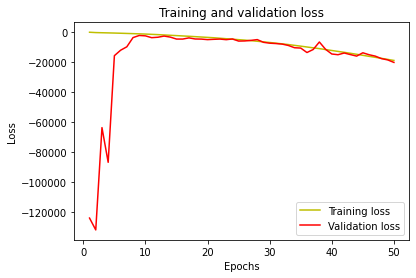

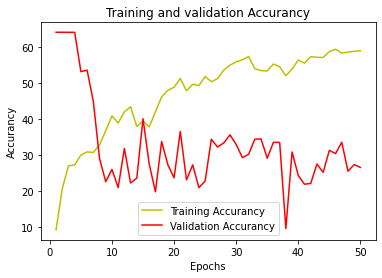

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history1.history['iou_score']
val_acc = history1.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training Accurancy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurancy')
plt.title('Training and validation Accurancy')
plt.xlabel('Epochs')
plt.ylabel('Accurancy')
plt.legend()
plt.show()

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/gdrive/My Drive/Dress_Segmentation/dress_segm.h5', compile=False)

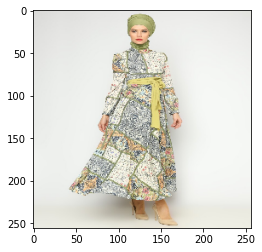

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non1.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

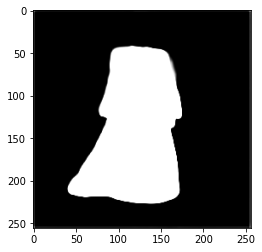

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

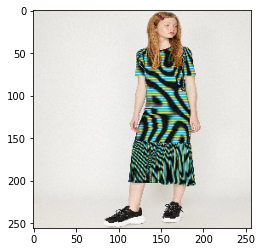

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non2.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

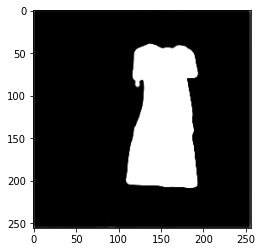

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

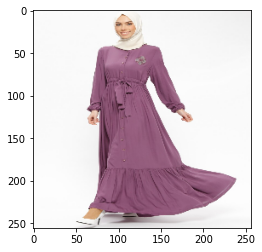

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non3.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

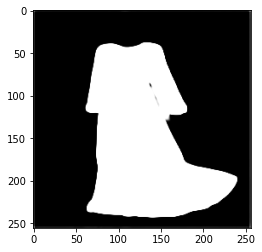

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

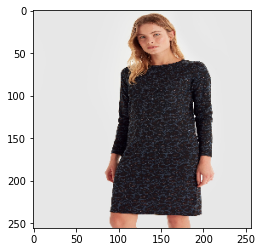

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non4.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

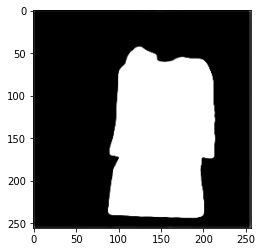

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

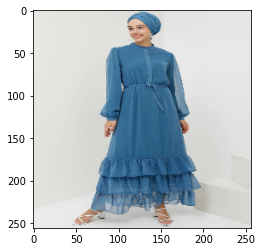

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non5.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

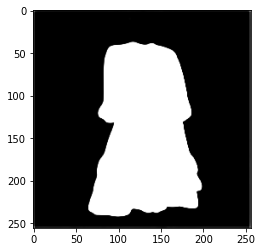

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

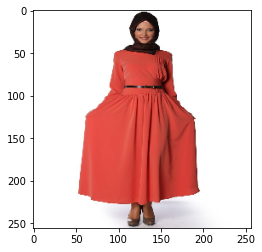

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non6.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

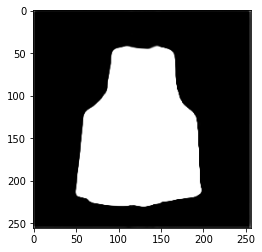

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

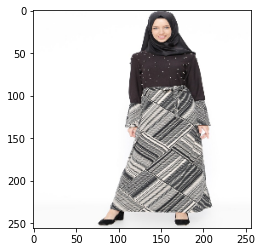

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non7.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

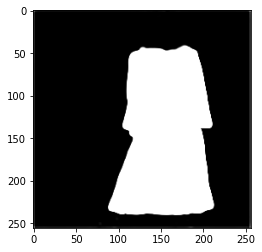

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

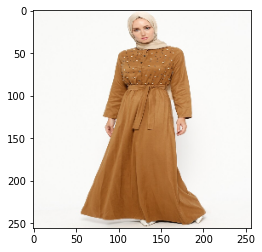

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non8.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

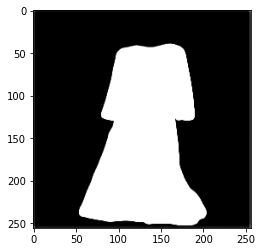

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

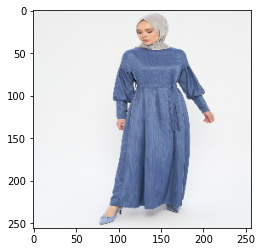

In [ ]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/gdrive/My Drive/Dress_Segmentation/Test_Gorselleri/non9.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

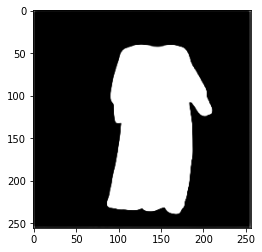

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

#Results

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [7]:
%cd '/gdrive/My Drive/Dress_Segmentation/'

/gdrive/My Drive/Dress_Segmentation


In [11]:
#importing required libraries 
from cv2 import cv2 
from PIL import Image
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [14]:
from tensorflow import keras
model = keras.models.load_model('/gdrive/My Drive/Dress_Segmentation/dress_segm.h5', compile=False)

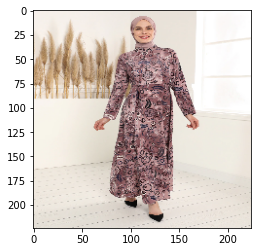

In [15]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('Test/c1.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

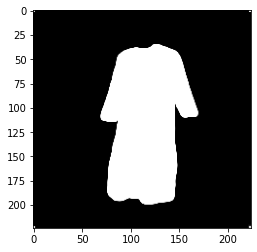

In [16]:
#View and Save segmented image
prediction_image = prediction.reshape(224,224)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

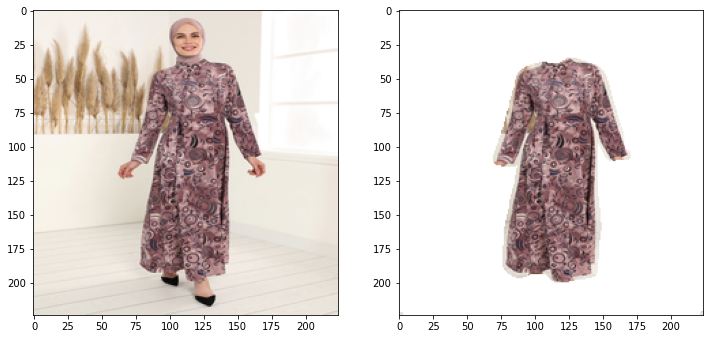

In [17]:
prediction_image = prediction.reshape(224,224)
#prediction = model(image)
pred = np.dstack([prediction_image, prediction_image, prediction_image])
pred = (pred * 255).astype(np.uint8)
cv2.imwrite('pred77.png', pred)
original = Image.open('Test/c1.jpg')
original = original.resize((224,224), Image.ANTIALIAS)
original.save('original77.png')
mask = cv2.imread('pred77.png')
dress = cv2.imread('original77.png')

_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
# copy where we'll assign the new values
background = np.copy(dress)
# boolean indexing and assignment based on mask
background[(mask==0).all(-1)] = [255,255,255]

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(cv2.cvtColor(dress, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

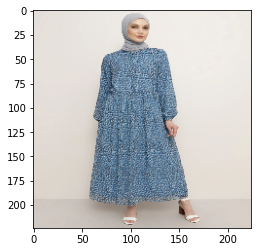

In [18]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('Test/d4.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

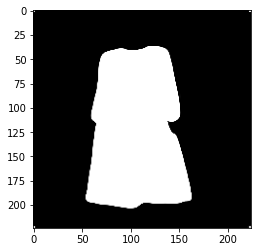

In [19]:
#View and Save segmented image
prediction_image = prediction.reshape(224,224)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

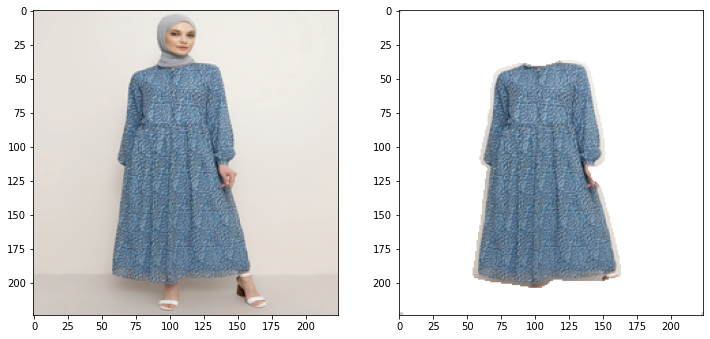

In [20]:
prediction_image = prediction.reshape(224,224)
#prediction = model(image)
pred = np.dstack([prediction_image, prediction_image, prediction_image])
pred = (pred * 255).astype(np.uint8)
cv2.imwrite('predd4.png', pred)
original = Image.open('Test/d4.jpg')
original = original.resize((224,224), Image.ANTIALIAS)
original.save('originald4.png')
mask = cv2.imread('predd4.png')
dress = cv2.imread('originald4.png')

_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
# copy where we'll assign the new values
background = np.copy(dress)
# boolean indexing and assignment based on mask
background[(mask==0).all(-1)] = [255,255,255]

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(cv2.cvtColor(dress, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

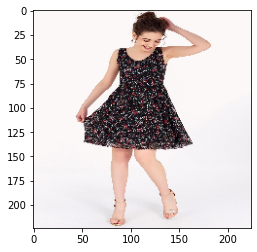

In [21]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('Test/d1.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

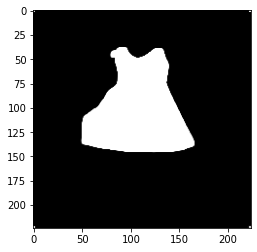

In [22]:
#View and Save segmented image
prediction_image = prediction.reshape(224,224)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

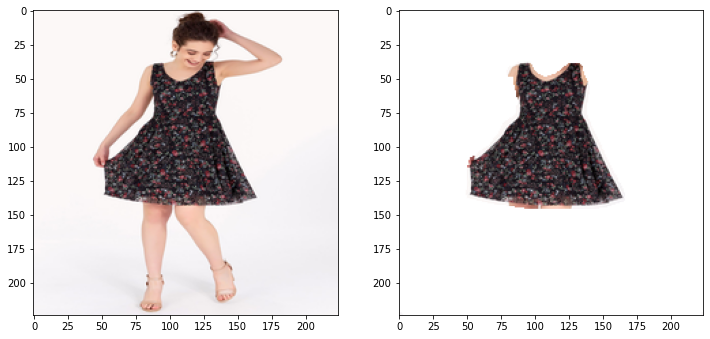

In [23]:
prediction_image = prediction.reshape(224,224)
#prediction = model(image)
pred = np.dstack([prediction_image, prediction_image, prediction_image])
pred = (pred * 255).astype(np.uint8)
cv2.imwrite('predd1.png', pred)
original = Image.open('Test/d1.jpg')
original = original.resize((224,224), Image.ANTIALIAS)
original.save('originald1.png')
mask = cv2.imread('predd1.png')
dress = cv2.imread('originald1.png')

_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
# copy where we'll assign the new values
background = np.copy(dress)
# boolean indexing and assignment based on mask
background[(mask==0).all(-1)] = [255,255,255]

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(cv2.cvtColor(dress, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

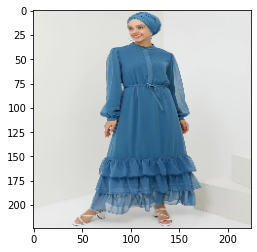

In [24]:
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('Test/d6.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

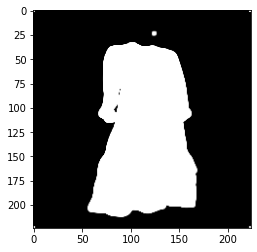

In [25]:
#View and Save segmented image
prediction_image = prediction.reshape(224,224)
plt.imshow(prediction_image, cmap='gray')
#plt.imsave('images/test_images/segmented.jpg', prediction_image, cmap='gray')

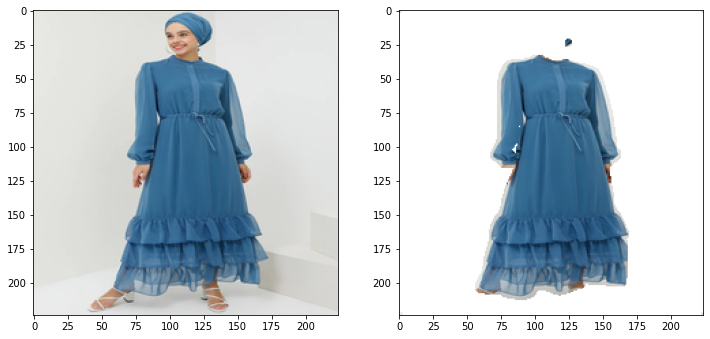

In [26]:
prediction_image = prediction.reshape(224,224)
#prediction = model(image)
pred = np.dstack([prediction_image, prediction_image, prediction_image])
pred = (pred * 255).astype(np.uint8)
cv2.imwrite('predd6.png', pred)
original = Image.open('Test/d6.jpg')
original = original.resize((224,224), Image.ANTIALIAS)
original.save('originald6.png')
mask = cv2.imread('predd6.png')
dress = cv2.imread('originald6.png')

_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
# copy where we'll assign the new values
background = np.copy(dress)
# boolean indexing and assignment based on mask
background[(mask==0).all(-1)] = [255,255,255]

fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(cv2.cvtColor(dress, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

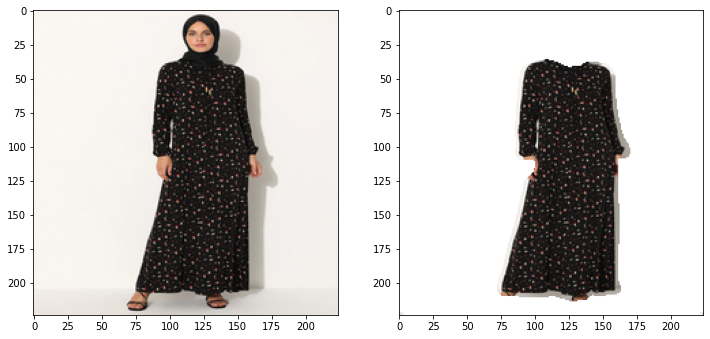

In [27]:
test_img = cv2.imread('Test/o3.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
#plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
prediction_image = prediction.reshape(224,224)
#plt.imshow(prediction_image, cmap='gray')
pred = np.dstack([prediction_image, prediction_image, prediction_image])
pred = (pred * 255).astype(np.uint8)
cv2.imwrite('pred3.png', pred)
original = Image.open('Test/o3.jpg')
original = original.resize((224,224), Image.ANTIALIAS)
original.save('original3.png')
mask = cv2.imread('pred3.png')
dress = cv2.imread('original3.png')
_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
background = np.copy(dress)
background[(mask==0).all(-1)] = [255,255,255]
fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(cv2.cvtColor(dress, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

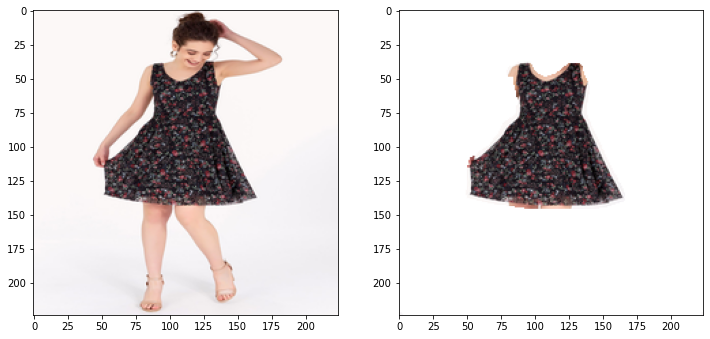

In [28]:
test_img = cv2.imread('Test/d1.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
#plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
prediction_image = prediction.reshape(224,224)
#plt.imshow(prediction_image, cmap='gray')
pred = np.dstack([prediction_image, prediction_image, prediction_image])
pred = (pred * 255).astype(np.uint8)
cv2.imwrite('pred2.png', pred)
original = Image.open('Test/d1.jpg')
original = original.resize((224,224), Image.ANTIALIAS)
original.save('original2.png')
mask = cv2.imread('pred2.png')
dress = cv2.imread('original2.png')
_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
background = np.copy(dress)
background[(mask==0).all(-1)] = [255,255,255]
fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(cv2.cvtColor(dress, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

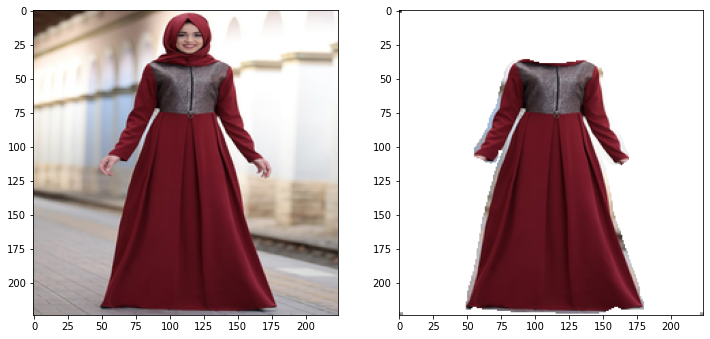

In [29]:
test_img = cv2.imread('Test/d3.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (224,224))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
#plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)
prediction = model.predict(test_img)
prediction_image = prediction.reshape(224,224)
#plt.imshow(prediction_image, cmap='gray')
pred = np.dstack([prediction_image, prediction_image, prediction_image])
pred = (pred * 255).astype(np.uint8)
cv2.imwrite('pred33.png', pred)
original = Image.open('Test/d3.jpg')
original = original.resize((224,224), Image.ANTIALIAS)
original.save('original33.png')
mask = cv2.imread('pred33.png')
dress = cv2.imread('original33.png')
_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
background = np.copy(dress)
background[(mask==0).all(-1)] = [255,255,255]
fig, ax = plt.subplots(1,2,figsize=(12,12))
ax[0].imshow(cv2.cvtColor(dress, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))